In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('./extracted_dataset.csv')
data.head()

,Unnamed: 0,ZCR,AVERAGE_ENERGY,SILENT_RATIO,CLASS
0,0,0.083166,2.125283e+07,0.825618,0.0
1,1,0.056117,1.243599e+07,0.835021,0.0
2,2,0.076404,3.604795e+07,0.809572,0.0
3,3,0.033353,2.818954e+07,0.838099,0.0
4,4,0.101589,1.147018e+07,0.849204,0.0


In [ ]:
print(data.isna().sum())

Unnamed: 0        0
ZCR               0
AVERAGE_ENERGY    0
SILENT_RATIO      0
CLASS             0
dtype: int64


In [ ]:
data.describe()

,Unnamed: 0,ZCR,AVERAGE_ENERGY,SILENT_RATIO,CLASS
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,499.500000,0.103768,2.631159e+07,0.827613,4.500000
std,288.819436,0.041886,2.396840e+07,0.024517,2.873719
min,0.000000,0.021714,6.178678e+04,0.767521,0.000000
25%,249.750000,0.070328,9.781419e+06,0.810039,2.000000
50%,499.500000,0.099618,1.834412e+07,0.824969,4.500000
75%,749.250000,0.132136,3.768007e+07,0.842175,7.000000
max,999.000000,0.275001,1.777716e+08,0.926341,9.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1000 non-null   int64  
 1   ZCR             1000 non-null   float64
 2   AVERAGE_ENERGY  1000 non-null   float64
 3   SILENT_RATIO    1000 non-null   float64
 4   CLASS           1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

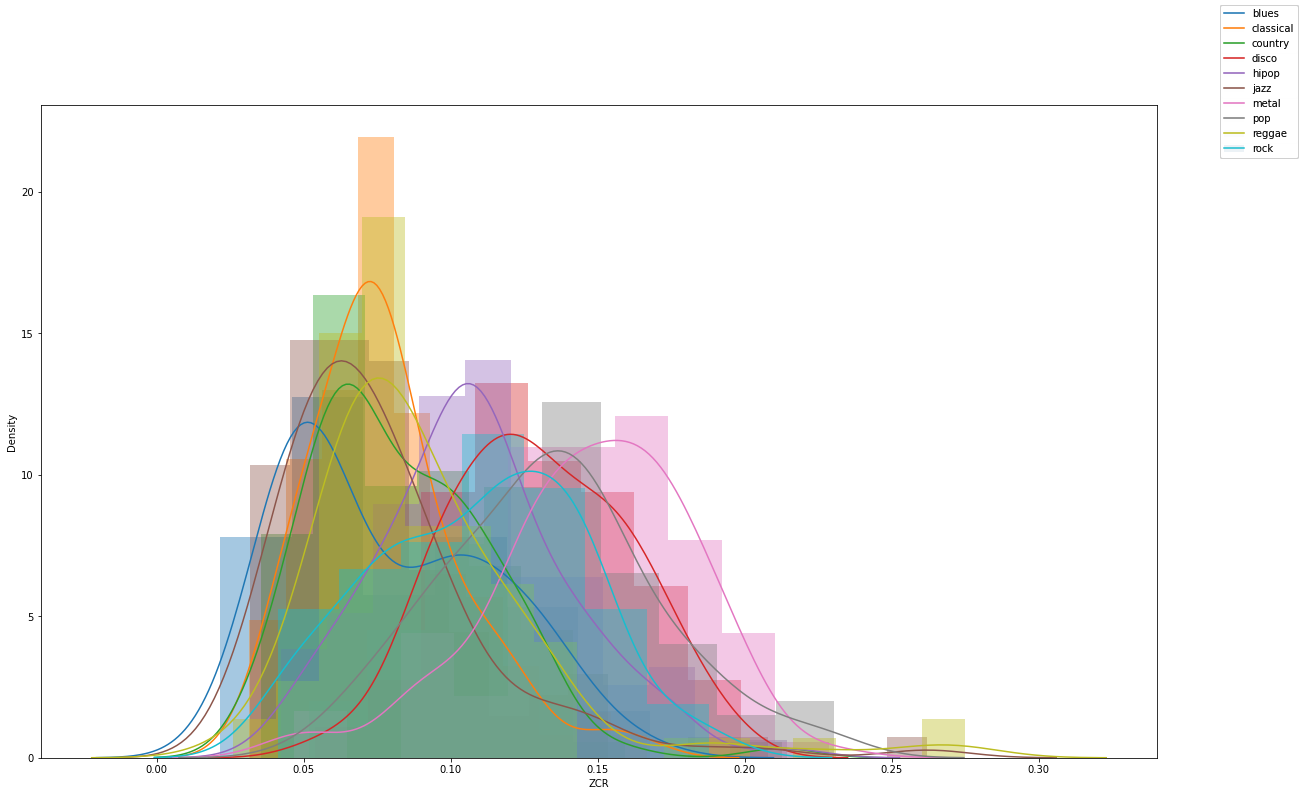

In [ ]:
genres = [data[data['CLASS'] == i] for i in range(10)]
genre_names = ['blues', 'classical', 'country', 'disco', 'hipop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

fig = plt.figure(figsize=(20,12))

for s in genres:
  class_index = int(s['CLASS'].min())
  genre_name = genre_names[class_index]
  
  sns.distplot(s['ZCR'], label=genre_name)
  fig.legend(labels=genre_names)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

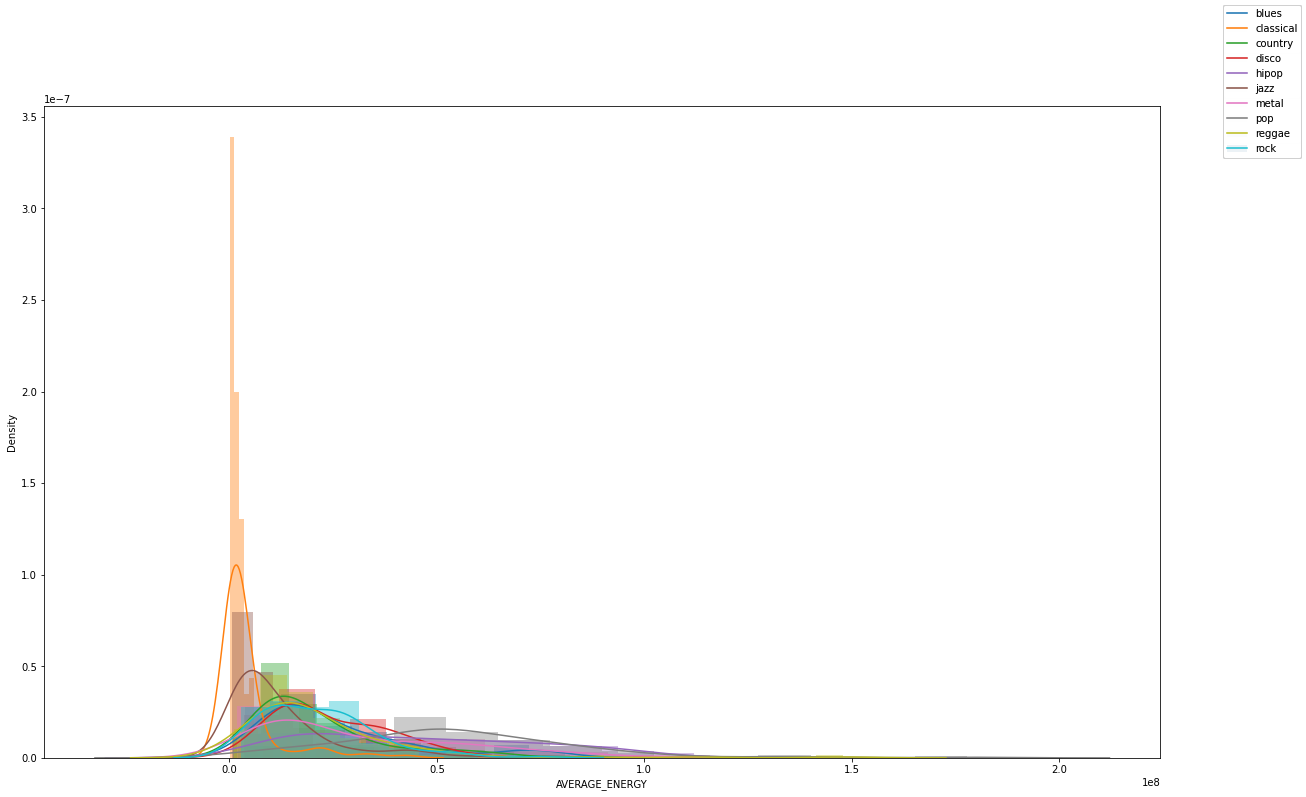

In [ ]:
fig = plt.figure(figsize=(20,12))

for s in genres:
  class_index = int(s['CLASS'].min())
  genre_name = genre_names[class_index]
  
  sns.distplot(s['AVERAGE_ENERGY'], label=genre_name)
  fig.legend(labels=genre_names)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

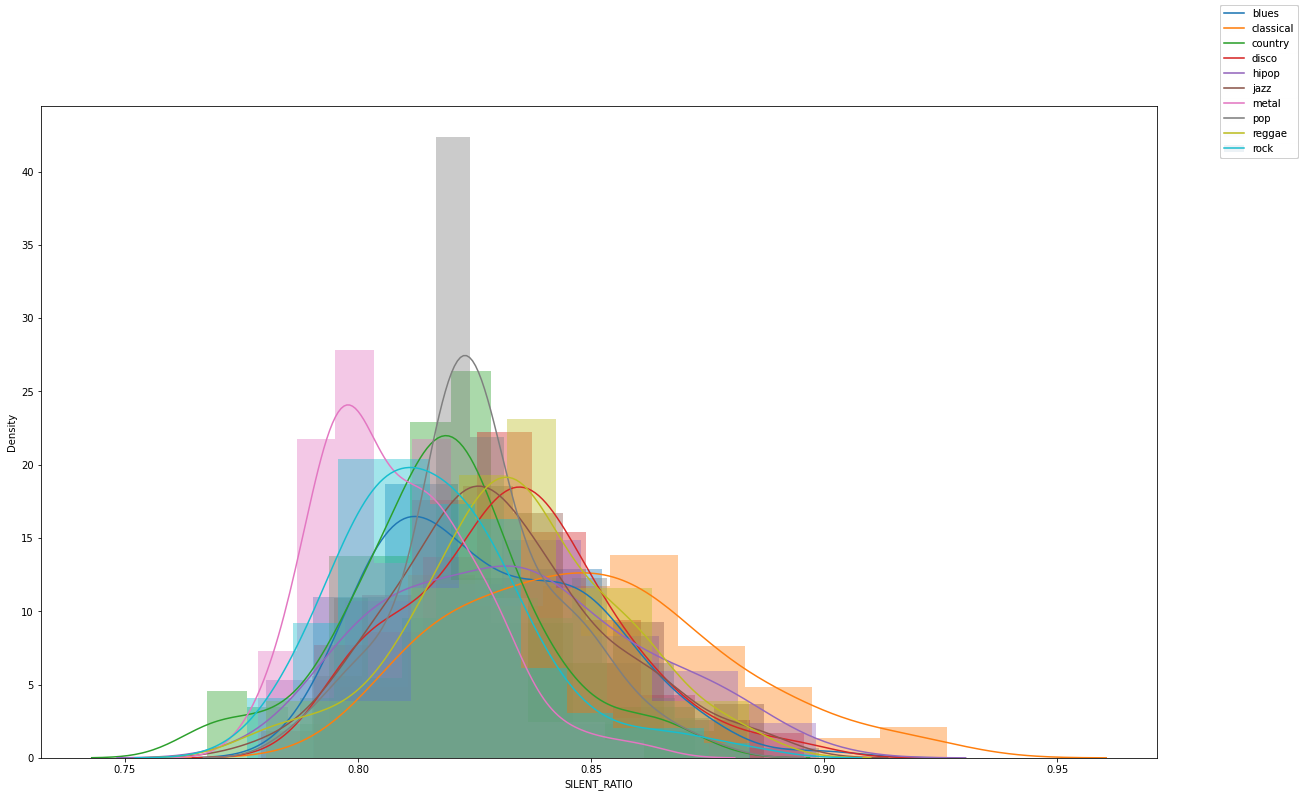

In [ ]:
fig = plt.figure(figsize=(20,12))

for s in genres:
  class_index = int(s['CLASS'].min())
  genre_name = genre_names[class_index]
  
  sns.distplot(s['SILENT_RATIO'], label=genre_name)
  fig.legend(labels=genre_names)

In [ ]:
data.corr()

,Unnamed: 0,ZCR,AVERAGE_ENERGY,SILENT_RATIO,CLASS
Unnamed: 0,1.000000,0.271431,0.169998,-0.172762,0.994988
ZCR,0.271431,1.000000,0.291785,-0.167643,0.268331
AVERAGE_ENERGY,0.169998,0.291785,1.000000,-0.298945,0.168420
SILENT_RATIO,-0.172762,-0.167643,-0.298945,1.000000,-0.176789
CLASS,0.994988,0.268331,0.168420,-0.176789,1.000000


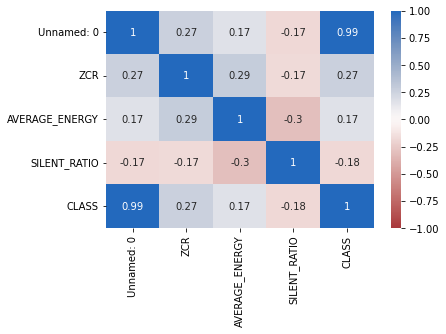

In [ ]:
sns.heatmap(data.corr(), annot = True, cmap = 'vlag_r', vmin = -1, vmax = 1)